In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from plotData import *
from visualizeBoundaryLinear import *
from gaussianKernelCV import *

# Linearly separable data

## Visualize data

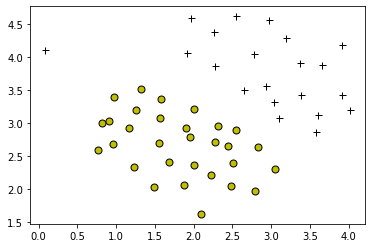

In [2]:
data_lin = loadmat('linearly-separable.mat')
X_lin = data_lin['X']
y_lin = data_lin['y']
plotData(X_lin, y_lin)

## Training

Text(0.5, 1.0, 'C = 0.03\nUnderfitting')

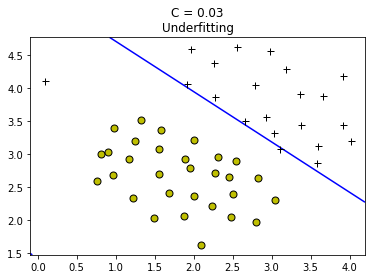

In [3]:
C = 0.03
clf_lin = SVC(C=C, kernel='linear')
clf_lin.fit(X_lin, y_lin.ravel())
visualizeBoundaryLinear(X_lin, y_lin, clf_lin)
plt.title('C = %g\nUnderfitting' % C)

Text(0.5, 1.0, 'C = 1')

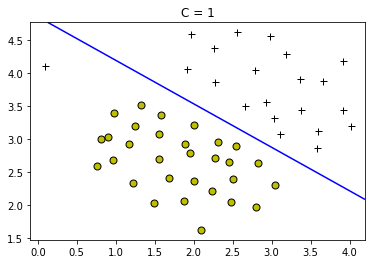

In [4]:
C = 1
clf_lin = SVC(C=C, kernel='linear')
clf_lin.fit(X_lin, y_lin.ravel())
visualizeBoundaryLinear(X_lin, y_lin, clf_lin)
plt.title('C = %g' % C)

Text(0.5, 1.0, 'C = 30\nOverfitting')

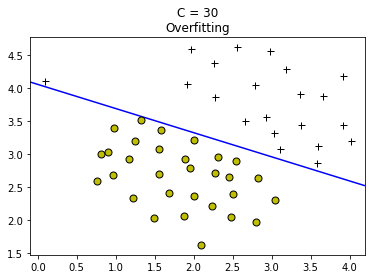

In [5]:
C = 30
clf_lin = SVC(C=C, kernel='linear')
clf_lin.fit(X_lin, y_lin.ravel())
visualizeBoundaryLinear(X_lin, y_lin, clf_lin)
plt.title('C = %g\nOverfitting' % C)

# Non linearly separable data

## Visualize data

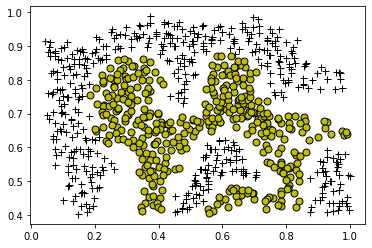

In [6]:
data_nlin = loadmat('non-linearly-separable.mat')
X_nlin = data_nlin['X']
y_nlin = data_nlin['y']
plotData(X_nlin, y_nlin)

## Training

Text(0.5, 1.0, 'RBF: C = 1, $\\sigma$ = 0.1')

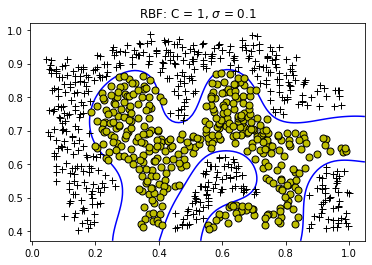

In [7]:
C = 1
sigma = 0.1
clf_nlin = SVC(C=C, kernel='rbf', gamma=1 / (2 * sigma**2))
clf_nlin.fit(X_nlin, y_nlin.ravel())
visualizeBoundaryLinear(X_nlin, y_nlin, clf_nlin)
plt.title('RBF: C = %g, $\sigma$ = %g' % (C, sigma))

# Non separable data

## Visualize data

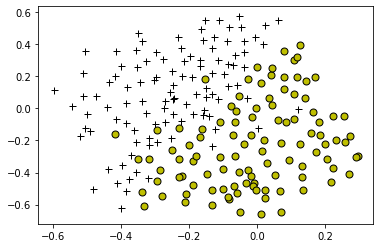

In [8]:
data_nsep = loadmat('non-separable.mat')
X_nsep = data_nsep['X']
y_nsep = data_nsep['y']
Xval_nsep = data_nsep['Xval']
yval_nsep = data_nsep['yval']
plotData(X_nsep, y_nsep)

## Training

### Custom cross-validation

Text(0.5, 1.0, 'C = 1, $\\sigma$ = 0.1')

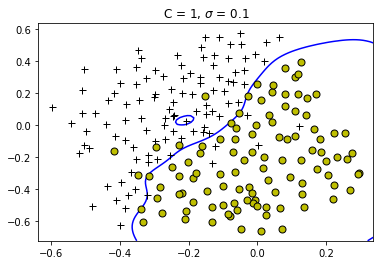

In [9]:
# Try different SVM Parameters 
C, sigma = gaussianKernelCV(X_nsep, y_nsep, Xval_nsep, yval_nsep)
# Train the SVM
clf_nsep = SVC(C=C, kernel='rbf', gamma=1 / (2 * sigma ** 2))
clf_nsep.fit(X_nsep, y_nsep.ravel())
visualizeBoundaryLinear(X_nsep, y_nsep, clf_nsep)
plt.title('C = %g, $\sigma$ = %g' % (C, sigma))

### sklearn GridSearchCV cross-validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'C = 10, $\\sigma$ = 0.3')

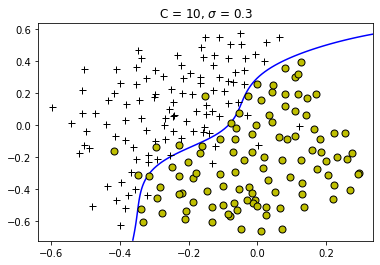

In [10]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
params = {
    'C': C_vec,
    'kernel': ['rbf'],
    'gamma': [1 / (2 * sigma ** 2) for sigma in sigma_vec]
}
clf_nsepCV = GridSearchCV(SVC(), params, cv=5)
clf_nsepCV.fit(np.vstack((X_nsep, Xval_nsep)), np.vstack((y_nsep, yval_nsep)).ravel())
visualizeBoundaryLinear(X_nsep, y_nsep, clf_nsepCV)
plt.title('C = %g, $\sigma$ = %g' % (clf_nsepCV.best_params_['C'], 1 / np.sqrt(2 * clf_nsepCV.best_params_['gamma'])))